In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MY_BOUNDED_SET = 45000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 1000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [3]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [4]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [5]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(45000, 3) (45000, 3) (7949, 3) (7949, 3)


In [6]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []

In [7]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [8]:
def dense_layer(input, num_inputs, num_outputs):
    w = tf.Variable(tf.truncated_normal([num_inputs,num_outputs],stddev=0.05))
    #w = tf.Variable(tf.constant(0.05,shape=[num_inputs,num_outputs]))
    b = tf.Variable(tf.constant(0.05,shape=[num_outputs]))
    #print (w)
    #tf.matmul(input,w)
    #print (input.shape,w.shape,b.shape)
    #print (type(input),type(w),type(b))
    layer = tf.matmul(input,w) + b
    layer = tf.nn.relu(layer)
    
    return layer

In [9]:
'''
# Neural Network Structure

def nn_model(inputs):
    # Input Layer
    input_layer = tf.Variable(inputs)
    
    # Hidden Layer #1
    h1 = dense_layer(input=input_layer,
                     num_inputs=num_input,
                     num_outputs=num_hidden1)
    
    # Hidden Layer #2
    h2 = dense_layer(input=h1,
                    num_inputs=num_hidden1,
                    num_outputs=num_hidden2)
    
    # Output Layer
    output_layer = dense_layer(input=h2,
                              num_inputs=num_hidden2,
                              num_outputs=num_output)
    
    return output_layer
'''

'\n# Neural Network Structure\n\ndef nn_model(inputs):\n    # Input Layer\n    input_layer = tf.Variable(inputs)\n    \n    # Hidden Layer #1\n    h1 = dense_layer(input=input_layer,\n                     num_inputs=num_input,\n                     num_outputs=num_hidden1)\n    \n    # Hidden Layer #2\n    h2 = dense_layer(input=h1,\n                    num_inputs=num_hidden1,\n                    num_outputs=num_hidden2)\n    \n    # Output Layer\n    output_layer = dense_layer(input=h2,\n                              num_inputs=num_hidden2,\n                              num_outputs=num_output)\n    \n    return output_layer\n'

In [10]:

X_train[0]

array([0.0827067, 0.740974 , 0.36644  ], dtype=float32)

In [11]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)
    
# Hidden Layer #1
h1 = dense_layer(input=input_layer,
                num_inputs=num_input,
                num_outputs=num_hidden1)
    
# Hidden Layer #2
h2 = dense_layer(input=h1,
                num_inputs=num_hidden1,
                num_outputs=num_hidden2)
    
# Output Layer
output_layer = dense_layer(input=h2,
                num_inputs=num_hidden2,
                num_outputs=num_output)
    

In [12]:
#cost = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(output_layer , y_true))))
#cost = tf.reduce_mean(tf.square(tf.subtract(output_layer, y_true)))
#cost = tf.reduce_mean(output_layer)
cost = cost_func(output_layer,y_true)
output_layer

Tensor("Relu_2:0", shape=(45000, 3), dtype=float32) Tensor("y_true:0", shape=(?, 3), dtype=float32)


<tf.Tensor 'Relu_2:0' shape=(45000, 3) dtype=float32>

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [14]:
session.run(tf.global_variables_initializer())

In [15]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [16]:
print (y_true.shape)

(?, 3)


In [17]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    for i in range(N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true:y_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]

In [18]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [19]:
train(N_EPOCHS)
#predict()
output_layer

[1]
Train Accuracy :  0.58369476
[2]
Train Accuracy :  0.58350974
[3]
Train Accuracy :  0.58332515
[4]
Train Accuracy :  0.58313924
[5]
Train Accuracy :  0.5829554
[6]
Train Accuracy :  0.58276993
[7]
Train Accuracy :  0.5825852
[8]
Train Accuracy :  0.582401
[9]
Train Accuracy :  0.58221453
[10]
Train Accuracy :  0.5820303
[11]
Train Accuracy :  0.5818449
[12]
Train Accuracy :  0.58165956
[13]
Train Accuracy :  0.58147407
[14]
Train Accuracy :  0.5812882
[15]
Train Accuracy :  0.5811037
[16]
Train Accuracy :  0.5809178
[17]
Train Accuracy :  0.5807319
[18]
Train Accuracy :  0.5805462
[19]
Train Accuracy :  0.58036083
[20]
Train Accuracy :  0.58017415
[21]
Train Accuracy :  0.5799884
[22]
Train Accuracy :  0.5798021
[23]
Train Accuracy :  0.5796158
[24]
Train Accuracy :  0.57942855
[25]
Train Accuracy :  0.5792412
[26]
Train Accuracy :  0.5790546
[27]
Train Accuracy :  0.5788674
[28]
Train Accuracy :  0.5786803
[29]
Train Accuracy :  0.578493
[30]
Train Accuracy :  0.57830524
[31]
Trai

[245]
Train Accuracy :  0.5526258
[246]
Train Accuracy :  0.55259466
[247]
Train Accuracy :  0.5525629
[248]
Train Accuracy :  0.5525318
[249]
Train Accuracy :  0.55250055
[250]
Train Accuracy :  0.55246866
[251]
Train Accuracy :  0.5524373
[252]
Train Accuracy :  0.55240595
[253]
Train Accuracy :  0.5523745
[254]
Train Accuracy :  0.55234283
[255]
Train Accuracy :  0.55231136
[256]
Train Accuracy :  0.55227983
[257]
Train Accuracy :  0.55224794
[258]
Train Accuracy :  0.55221665
[259]
Train Accuracy :  0.5521853
[260]
Train Accuracy :  0.5521539
[261]
Train Accuracy :  0.55212295
[262]
Train Accuracy :  0.5520913
[263]
Train Accuracy :  0.5520592
[264]
Train Accuracy :  0.55202746
[265]
Train Accuracy :  0.5519958
[266]
Train Accuracy :  0.55196404
[267]
Train Accuracy :  0.5519326
[268]
Train Accuracy :  0.5519008
[269]
Train Accuracy :  0.5518691
[270]
Train Accuracy :  0.5518383
[271]
Train Accuracy :  0.5518059
[272]
Train Accuracy :  0.55177444
[273]
Train Accuracy :  0.5517431
[

[485]
Train Accuracy :  0.54444355
[486]
Train Accuracy :  0.5444061
[487]
Train Accuracy :  0.5443684
[488]
Train Accuracy :  0.54433024
[489]
Train Accuracy :  0.544292
[490]
Train Accuracy :  0.5442538
[491]
Train Accuracy :  0.5442157
[492]
Train Accuracy :  0.54417807
[493]
Train Accuracy :  0.5441399
[494]
Train Accuracy :  0.54410195
[495]
Train Accuracy :  0.54406375
[496]
Train Accuracy :  0.54402536
[497]
Train Accuracy :  0.5439871
[498]
Train Accuracy :  0.54394954
[499]
Train Accuracy :  0.54391134
[500]
Train Accuracy :  0.54387283
[501]
Train Accuracy :  0.54383487
[502]
Train Accuracy :  0.54379696
[503]
Train Accuracy :  0.54375845
[504]
Train Accuracy :  0.54372007
[505]
Train Accuracy :  0.54368174
[506]
Train Accuracy :  0.5436436
[507]
Train Accuracy :  0.5436055
[508]
Train Accuracy :  0.5435673
[509]
Train Accuracy :  0.543529
[510]
Train Accuracy :  0.54349035
[511]
Train Accuracy :  0.5434519
[512]
Train Accuracy :  0.5434137
[513]
Train Accuracy :  0.5433757
[

[725]
Train Accuracy :  0.53422076
[726]
Train Accuracy :  0.5341684
[727]
Train Accuracy :  0.5341153
[728]
Train Accuracy :  0.53406215
[729]
Train Accuracy :  0.5340091
[730]
Train Accuracy :  0.53395593
[731]
Train Accuracy :  0.5339021
[732]
Train Accuracy :  0.5338479
[733]
Train Accuracy :  0.5337943
[734]
Train Accuracy :  0.5337401
[735]
Train Accuracy :  0.5336859
[736]
Train Accuracy :  0.5336317
[737]
Train Accuracy :  0.53357726
[738]
Train Accuracy :  0.53352267
[739]
Train Accuracy :  0.5334672
[740]
Train Accuracy :  0.53341246
[741]
Train Accuracy :  0.5333569
[742]
Train Accuracy :  0.5333017
[743]
Train Accuracy :  0.53324676
[744]
Train Accuracy :  0.5331909
[745]
Train Accuracy :  0.5331347
[746]
Train Accuracy :  0.5330784
[747]
Train Accuracy :  0.5330218
[748]
Train Accuracy :  0.53296566
[749]
Train Accuracy :  0.5329087
[750]
Train Accuracy :  0.53285205
[751]
Train Accuracy :  0.5327946
[752]
Train Accuracy :  0.5327378
[753]
Train Accuracy :  0.5326805
[754]

[965]
Train Accuracy :  0.5158233
[966]
Train Accuracy :  0.5157285
[967]
Train Accuracy :  0.5156335
[968]
Train Accuracy :  0.5155383
[969]
Train Accuracy :  0.5154431
[970]
Train Accuracy :  0.5153478
[971]
Train Accuracy :  0.5152533
[972]
Train Accuracy :  0.5151576
[973]
Train Accuracy :  0.5150621
[974]
Train Accuracy :  0.5149667
[975]
Train Accuracy :  0.51487106
[976]
Train Accuracy :  0.5147756
[977]
Train Accuracy :  0.5146799
[978]
Train Accuracy :  0.5145837
[979]
Train Accuracy :  0.51448846
[980]
Train Accuracy :  0.51439244
[981]
Train Accuracy :  0.5142966
[982]
Train Accuracy :  0.5142002
[983]
Train Accuracy :  0.5141042
[984]
Train Accuracy :  0.5140082
[985]
Train Accuracy :  0.5139119
[986]
Train Accuracy :  0.51381594
[987]
Train Accuracy :  0.5137198
[988]
Train Accuracy :  0.51362336
[989]
Train Accuracy :  0.513527
[990]
Train Accuracy :  0.51343036
[991]
Train Accuracy :  0.51333416
[992]
Train Accuracy :  0.51323754
[993]
Train Accuracy :  0.5131409
[994]
T

<tf.Tensor 'Relu_2:0' shape=(45000, 3) dtype=float32>

In [20]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [21]:
#print (session.run(output_layer))

In [22]:
#print (session.run(cost))

In [23]:
print (rmse_a)

[0.58369476, 0.58350974, 0.58332515, 0.58313924, 0.5829554, 0.58276993, 0.5825852, 0.582401, 0.58221453, 0.5820303, 0.5818449, 0.58165956, 0.58147407, 0.5812882, 0.5811037, 0.5809178, 0.5807319, 0.5805462, 0.58036083, 0.58017415, 0.5799884, 0.5798021, 0.5796158, 0.57942855, 0.5792412, 0.5790546, 0.5788674, 0.5786803, 0.578493, 0.57830524, 0.57811785, 0.5779292, 0.5777416, 0.5775527, 0.5773648, 0.57717574, 0.5769869, 0.57679594, 0.57660663, 0.5764177, 0.5762265, 0.5760366, 0.5758452, 0.57565475, 0.5754623, 0.57526994, 0.5750783, 0.57488513, 0.57469267, 0.57449955, 0.57430565, 0.5741117, 0.5739167, 0.5737218, 0.57352614, 0.5733301, 0.5731341, 0.5729366, 0.5727399, 0.5725421, 0.5723435, 0.5721453, 0.5719458, 0.57174593, 0.5715461, 0.57134503, 0.5711442, 0.5709424, 0.57073945, 0.5705369, 0.5703329, 0.57012916, 0.569924, 0.56971943, 0.5695129, 0.56930614, 0.5690988, 0.5688919, 0.5686835, 0.56847537, 0.5682647, 0.56805444, 0.5678437, 0.5676318, 0.567419, 0.5672068, 0.5669913, 0.5667766, 0.56

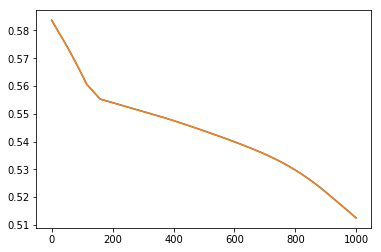

In [24]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)